# Kaggle Competition: Cover Type Prediction of Forests

## The Challenge : 

In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

## Data description : 

Natural resource managers responsible for developing ecosystem management strategies require basic descriptive information including inventory data for forested lands to support their decision-making processes. However, managers generally do not have this type of data for inholdings or neighboring lands that are outside their immediate jurisdiction. One method of obtaining this information is through the use of predictive models.

The study area included four wilderness areas found in the Roosevelt National Forest of northern Colorado. A total of twelve cartographic measures were utilized as independent variables in the predictive models, while seven major forest cover types were used as dependent variables. Several subsets of these variables were examined to determine the best overall predictive model.

File descriptions :

    train-set.csv : the training set
    test-set.csv :the test set
    submission-example.csv : a sample submission file in the correct format

Data descriptions

Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

Some background information for these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value.

As for primary major tree species in these areas, Neota would have spruce/fir (type 1), while Rawah and Comanche Peak would probably have lodgepole pine (type 2) as their primary species, followed by spruce/fir and aspen (type 5). Cache la Poudre would tend to have Ponderosa pine (type 3), Douglas-fir (type 6), and cottonwood/willow (type 4).

The Rawah and Comanche Peak areas would tend to be more typical of the overall dataset than either the Neota or Cache la Poudre, due to their assortment of tree species and range of predictive variable values (elevation, etc.) Cache la Poudre would probably be more unique than the others, due to its relatively low elevation range and species composition.

Number of Attributes: 12 measures, but 54 columns of data (10 quantitative variables, 4 binary wilderness areas and 40 binary soil type variables)

Attribute information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database.

We can run our jupyter-notebook on other computers with SSH in order to save some time.

In [1]:
#speillet@c128-21.enst.fr jupyter notebook --no-browser --port=8887

First, we begin to import the packages that we need in order to make the data analysis.

### Imports:

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import ipywidgets as widgets

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=4, random_state=22)

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# pour les warnings 
import warnings
warnings.filterwarnings('ignore')

After the package, we import the data to analyse:

### Import of the datasets: 

In [ ]:
# We import the datasets in a dataframe with the library panda.  
train = pd.read_csv("train-set.csv", header='infer')
# We remove the first column which was empty and we take for index of the dataframe the column with the label index.
train = train.set_index('Id')

We can see that the data doesn't contain any date or any string. So it will be easier to analyse it. We want to know if there is some null values in our training set.

In [4]:
train[train.isnull().any(axis=1)]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,


We can see now that there no empty values in our dataset.

In [5]:
# Import of dataset of Test:
test = pd.read_csv("test-set.csv", header='infer')
# Take for index the column 'Id'.
test = test.set_index('Id')
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
528721,2953,224,9,55,11,1600,206,251,176,1669,...,0,1,0,0,0,0,0,0,0,0
528722,2977,233,14,42,1,1282,196,252,192,277,...,0,0,0,0,0,0,0,0,0,0
528723,3055,227,9,120,5,2724,207,249,178,908,...,0,0,0,0,0,0,0,0,0,0
528724,2615,107,13,277,74,967,241,224,110,3545,...,0,0,0,0,0,0,0,0,0,0
528725,3033,59,15,457,94,4086,233,213,99,4974,...,0,0,0,0,0,0,0,0,0,0


### Etudes statistiques des données: 

In [6]:
# Size of our training sample:
print(train.shape)

(528720, 55)


We can see that we have 528720 samples and 55 features.

In [7]:
# Datatype of the features:
print(train.dtypes)

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

All the data are of the type integer of 64 bits ('int64').

In [8]:
# Skewness of the features:
print(train.skew())

Elevation                              -0.813043
Aspect                                  0.400137
Slope                                   0.782664
Horizontal_Distance_To_Hydrology        1.132040
Vertical_Distance_To_Hydrology          1.776392
Horizontal_Distance_To_Roadways         0.707285
Hillshade_9am                          -1.171582
Hillshade_Noon                         -1.060335
Hillshade_3pm                          -0.277797
Horizontal_Distance_To_Fire_Points      1.281252
Wilderness_Area1                        0.205902
Wilderness_Area2                        4.056198
Wilderness_Area3                        0.257077
Wilderness_Area4                        3.583439
Soil_Type1                             13.788065
Soil_Type2                              8.604088
Soil_Type3                             10.837269
Soil_Type4                              6.639116
Soil_Type5                             18.872986
Soil_Type6                              9.230680
Soil_Type7          

In [9]:
# Creation of descriptive statistics that summarize the central tendency in a dataframe :
describe = train.describe()
# Create a serie with the information about the standard deviation 
std = describe.loc['std']
# Let's take a look at the description of our dataframe.
describe.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,...,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000
mean,2959.800552,155.629891,14.095043,269.731845,46.474718,2352.595141,212.153062,223.343970,142.555615,1979.363977,...,0.090365,0.077678,0.002792,0.003276,0.000202,0.000471,0.026916,0.023646,0.015118,2.052294
std,280.351766,112.095470,7.501853,213.069124,58.433933,1563.557679,26.793767,19.813479,38.336178,1325.877589,...,0.286705,0.267665,0.052762,0.057141,0.014224,0.021696,0.161838,0.151943,0.122021,1.396863
min,1759.000000,-72.000000,-3.000000,-144.000000,-182.000000,-805.000000,-2.000000,0.000000,-17.000000,-704.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


### Data Visualization :

We are going to inspect our data with some visualization.

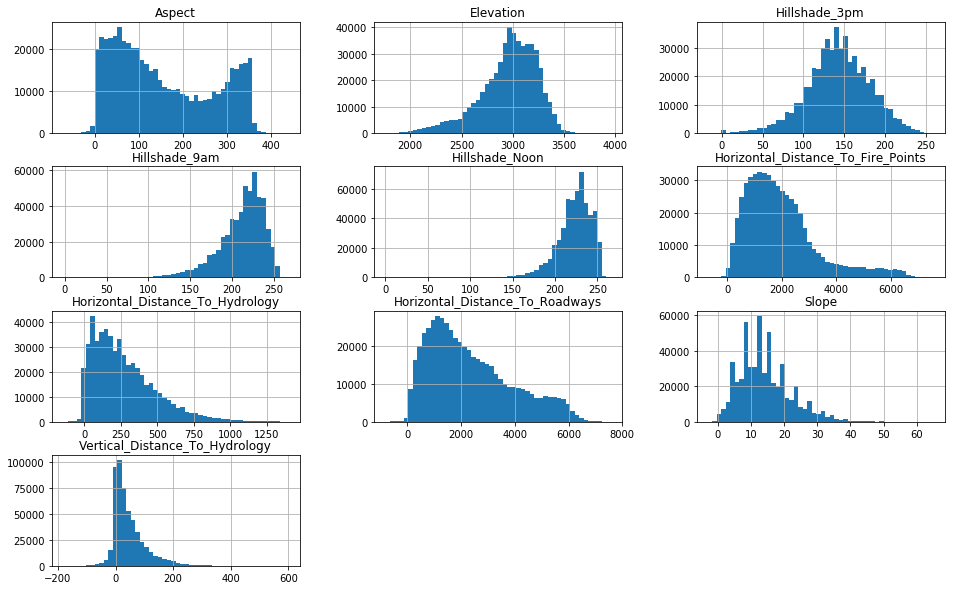

In [10]:
# We use histograms in order to see if there is some missing values.
train.iloc[:,:10].hist(figsize=(16,10), bins=50)
plt.show() 

We can now take a look at the distribution of the different features with box and density plots.

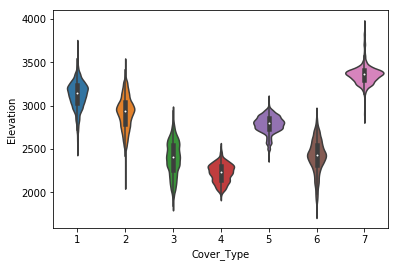

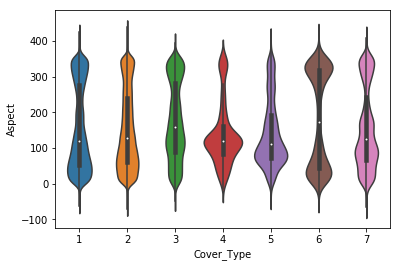

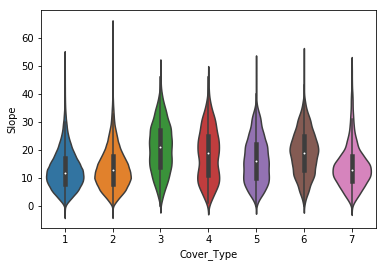

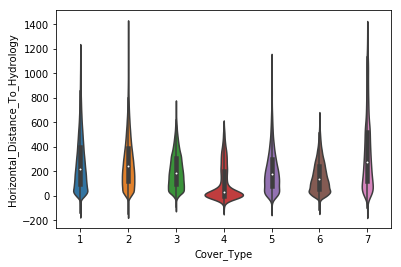

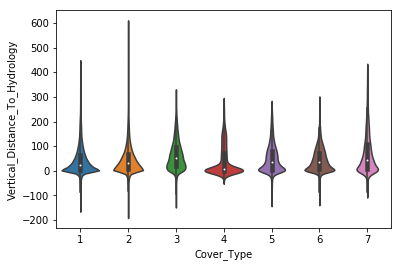

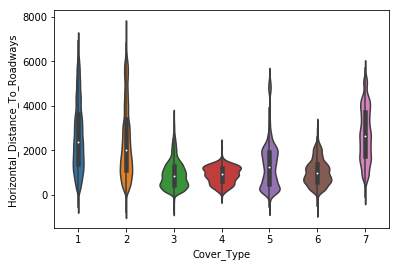

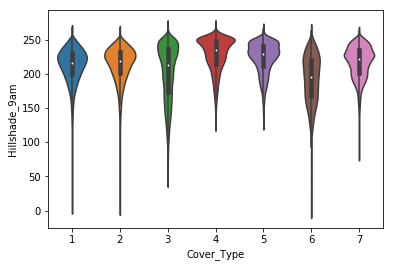

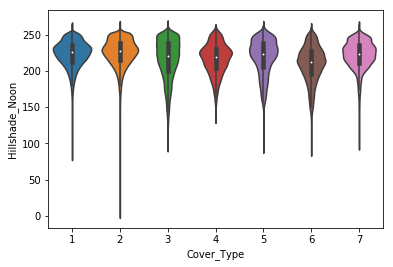

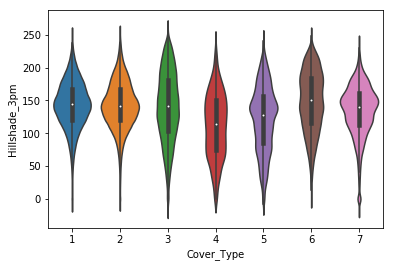

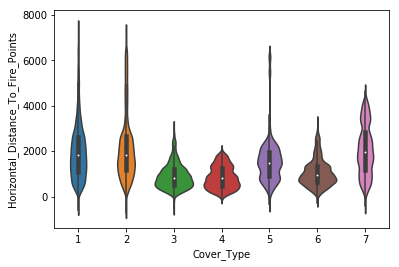

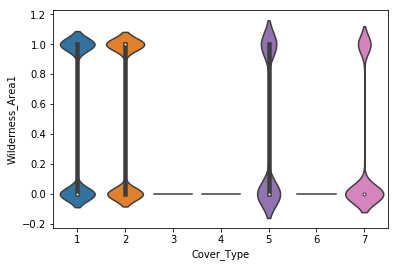

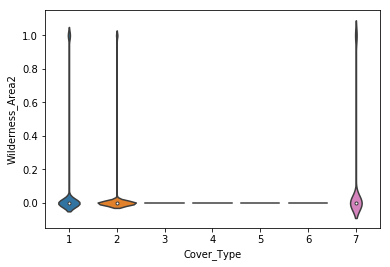

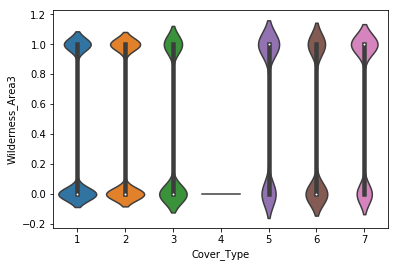

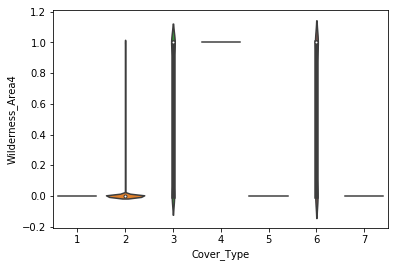

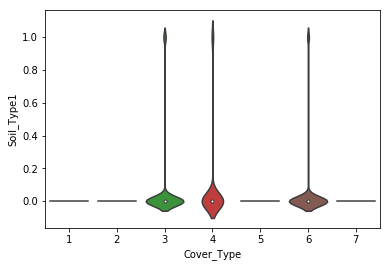

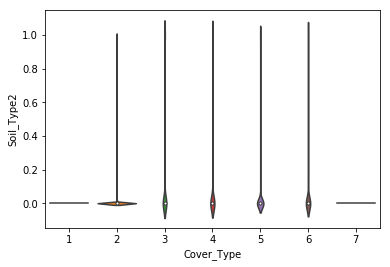

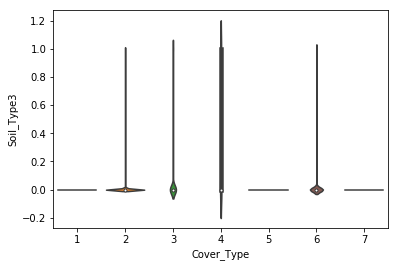

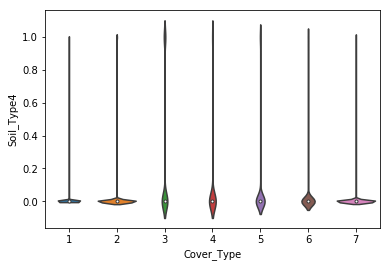

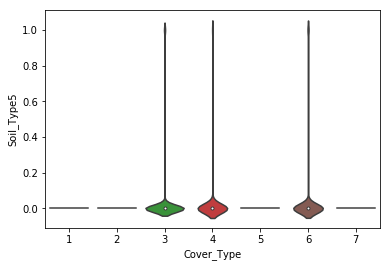

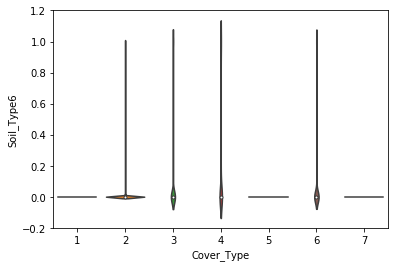

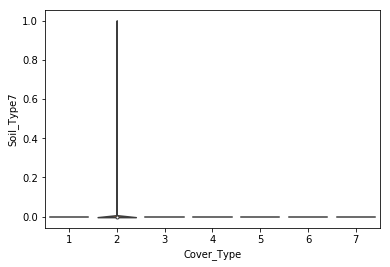

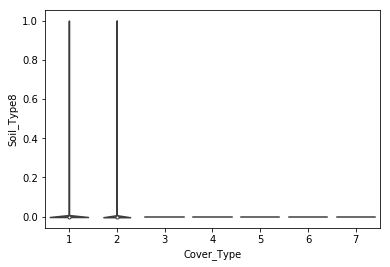

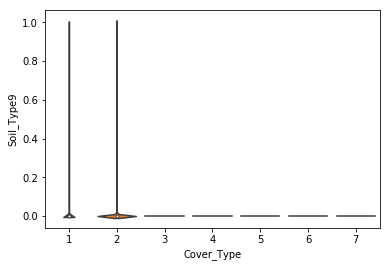

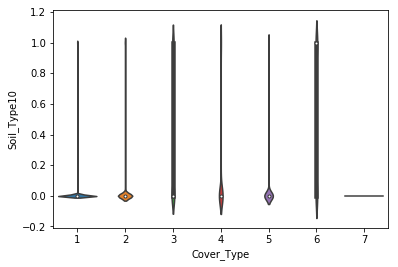

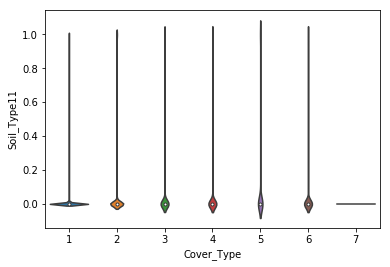

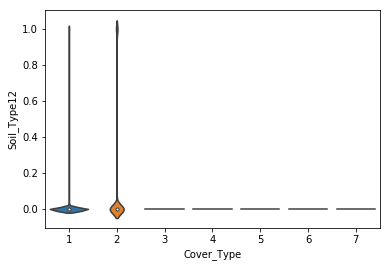

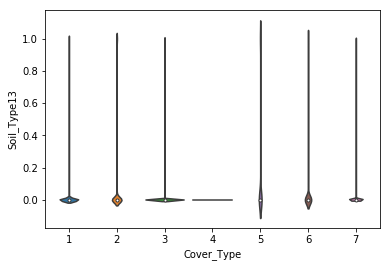

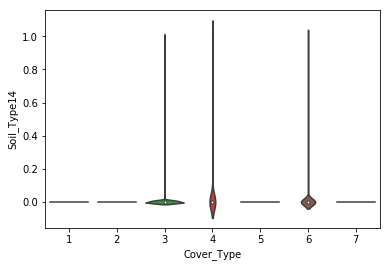

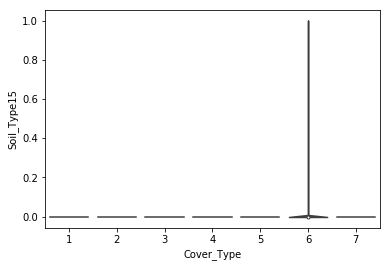

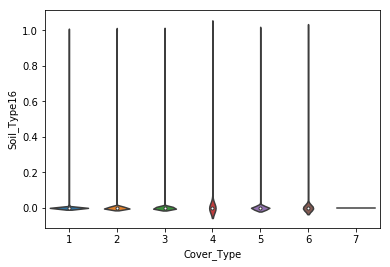

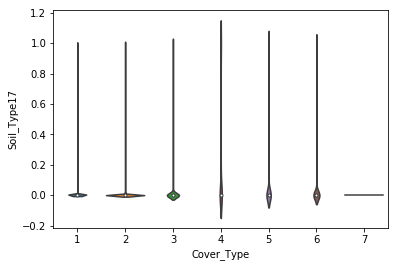

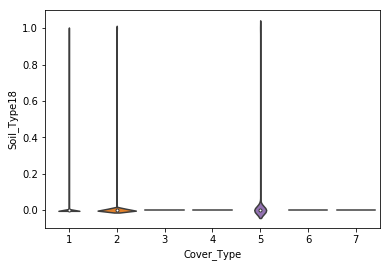

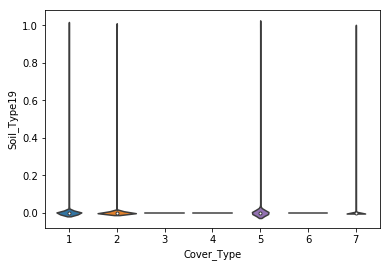

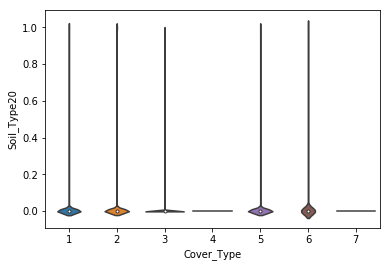

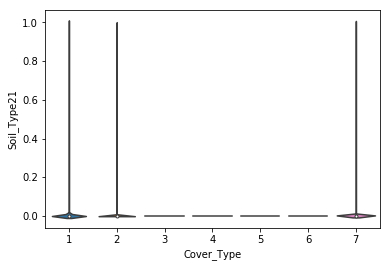

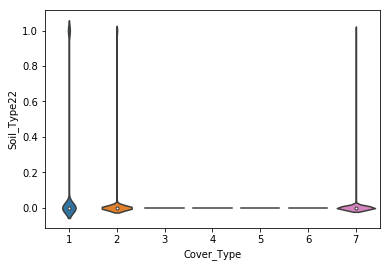

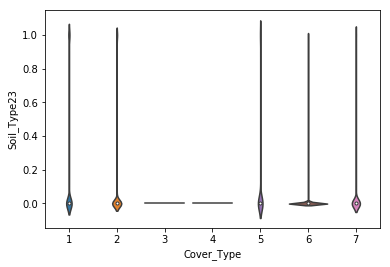

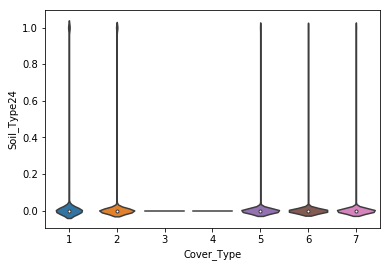

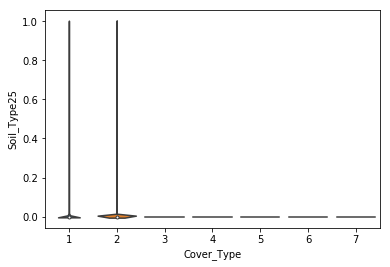

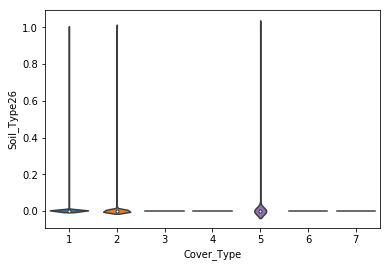

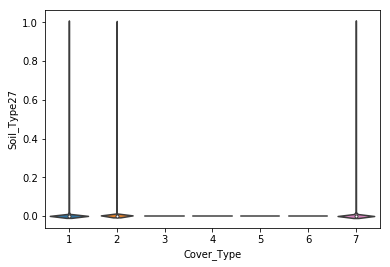

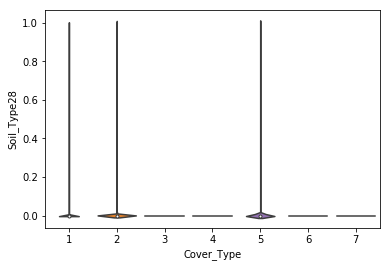

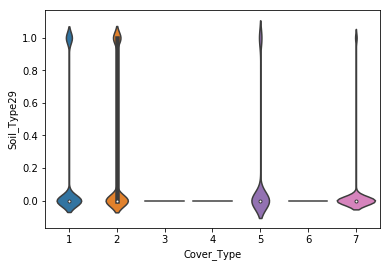

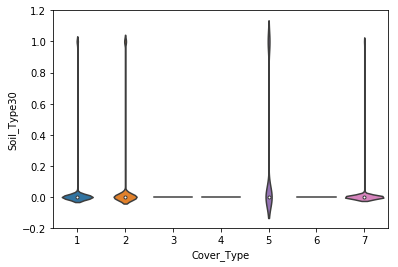

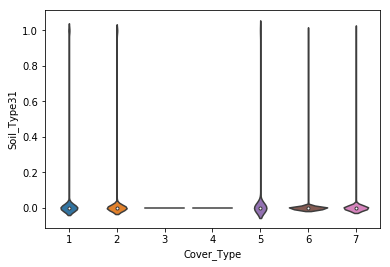

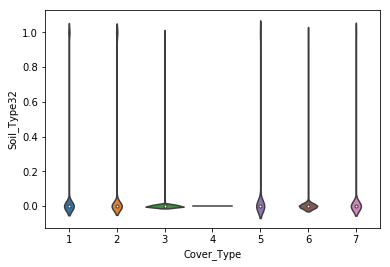

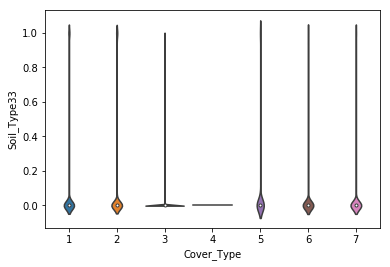

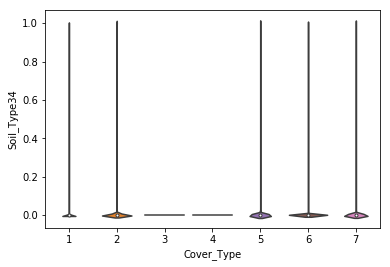

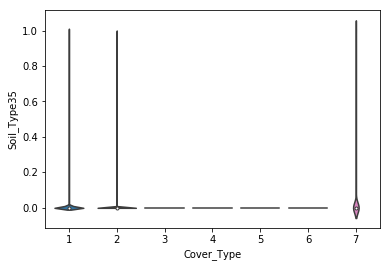

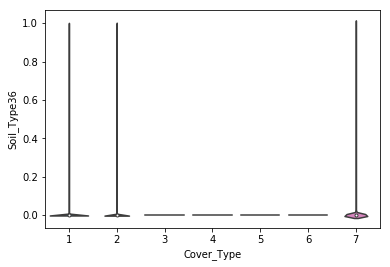

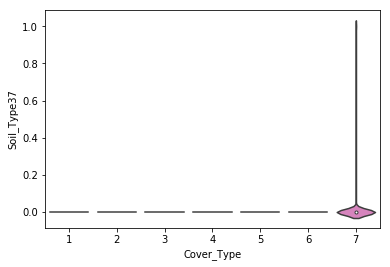

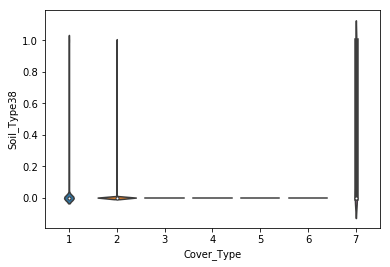

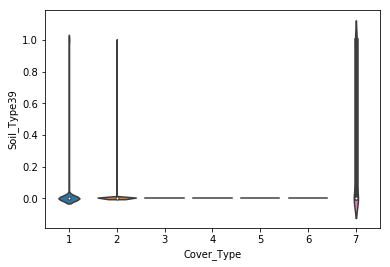

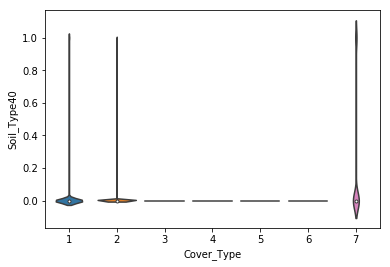

In [11]:
# We are going to use Violin Plot which is a combination of box and density plots:

#names of all the attributes 
cols = train.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=train,x=x,y=y[i])  
    plt.show()

We can see with those graph that:
- the 'Elevation' feature is has a separate distribution for most classes. Highly correlated with the target and hence an important attribute.

- feature 'Aspect' contains a couple of normal distribution for several classes.

- 'Horizontal distance to road' and 'Horizontal distance to hydrology' have similar distribution.

- 'Hillshade 9am' and 'Hillshade 9am' display left skew.

- 'Hillshade 3pm' is normal.

- 'Vertical distance to hydrology' has lots of 0s in it.

- 'Wilderness_Area3' gives no class distinction. As values are not present, others gives some scope to distinguish.

- Soil_Type, 1,5,8,9,12,14,18-22, 25-30 and 35-40 offer class distinction as values are not present for many classes.

### Data Cleaning : 
Once we have analyse the data through different visualizations, we are now going to see if can clean the data. 

First we take a look at the frequency of the different features and we are going to delete which have the lowest frequencies. 

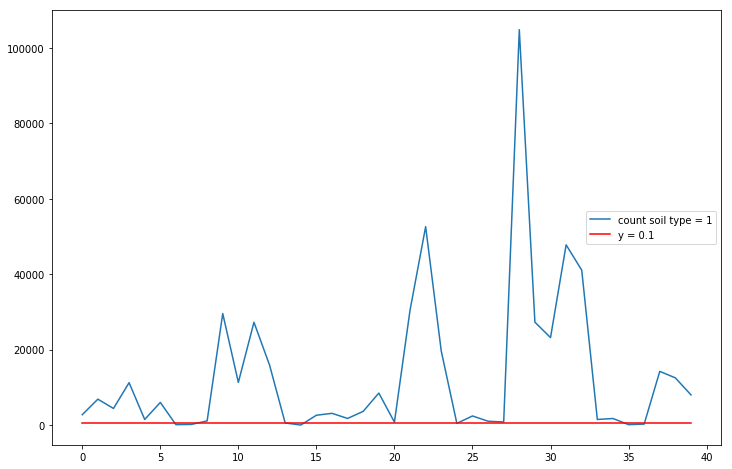

In [12]:
index = range(0,40)
const = 500 * np.ones(40)
freq_soil_type = []
for k in range(1,41):
    freq_soil_type.append(train['Soil_Type' + str(k)].value_counts()[1])

fig1 = plt.figure(figsize=(12, 8))
plt.plot(index, freq_soil_type, label ='count soil type = 1')
plt.plot(index,const,color = "red" , label='y = 0.1')
plt.legend(loc=7)
plt.show()

In [13]:
list_var = []
for f in freq_soil_type:
    if f < 500:
        list_var.append(freq_soil_type.index(f))
print(list_var)

[6, 7, 14, 24, 35, 36]


In [14]:
train = train.drop(['Soil_Type6', 'Soil_Type7', 'Soil_Type14', 'Soil_Type24', 'Soil_Type35', 'Soil_Type36'], axis=1)
test = test.drop(['Soil_Type6', 'Soil_Type7', 'Soil_Type14', 'Soil_Type24', 'Soil_Type35', 'Soil_Type36'], axis=1)

We are going to clean the feature which have a standard deviation almost equal to zero. 

In [15]:
# We made a list of the standard deviation of the different featuresn and put it in the ascending order.   
std_null = std.sort_values(ascending=True).index.tolist()[:1]
print(std_null)

['Soil_Type15']


In [16]:
#drop the columns with the selected feature.       
train = train.drop(columns=std_null)
test = test.drop(columns=std_null)

So finally, we drop the feature 'Soil_Type6', 'Soil_Type7', 'Soil_Type14', 'Soil_Type15', 'Soil_Type24', 'Soil_Type35', 'Soil_Type36'on our datasets of training and test.

### Feature Engineering :
Feature engineering was applied in order to add more features to the existing data. For now,
features were generated as a consequence of manual analysis. For instance, data contain many features based
on distance measures (e.g: elevation, vertical distance to hydrology, etc). Therefore, some features can be
combined in order to generate new ones that express some relation between them.

In [17]:
# Mean distance between amenities 
train['Mean_Amenities']=(train.Horizontal_Distance_To_Fire_Points + 
                            train.Horizontal_Distance_To_Hydrology + 
                            train.Horizontal_Distance_To_Roadways) / 3 

test['Mean_Amenities']=(test.Horizontal_Distance_To_Fire_Points + 
                             test.Horizontal_Distance_To_Hydrology + 
                             test.Horizontal_Distance_To_Roadways) / 3 

In [18]:
# Mean Distance to Fire and Water 
train['Mean_Fire_Hyd']=(train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology) / 2 
test['Mean_Fire_Hyd']=(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology) / 2 

In [19]:
# Elevation adjusted by Horizontal distance to Hyrdrology 
train['Elev_to_HD_Hyd']=train.Elevation - 0.2 * train.Horizontal_Distance_To_Hydrology 
test['Elev_to_HD_Hyd']=test.Elevation - 0.2 * test.Horizontal_Distance_To_Hydrology 

In [20]:
#Elevation adjusted by Horizontal distance to Roadways 
train['Elev_to_HD_Road']=train.Elevation - 0.05 * train.Horizontal_Distance_To_Roadways 
test['Elev_to_HD_Road']=test.Elevation - 0.05 * test.Horizontal_Distance_To_Roadways 

In [21]:
#Elevation adjusted by Vertical distance to Roadways 
train['Elev_to_VD_Hyd']=train.Elevation - train.Vertical_Distance_To_Hydrology 
test['Elev_to_VD_Hyd']= test.Elevation - test.Vertical_Distance_To_Hydrology 

In [22]:
#Linear Combination

# Combination between Horizontal Distance to hydrology and Horizontal Distance to Fire Points
train['HDTH_HDTFP'] = train.Horizontal_Distance_To_Hydrology - train.Horizontal_Distance_To_Fire_Points
test['HDTH_HDTFP'] = test.Horizontal_Distance_To_Hydrology - test.Horizontal_Distance_To_Fire_Points
train['HDTFP_HDTH'] = train.Horizontal_Distance_To_Hydrology + train.Horizontal_Distance_To_Fire_Points
test['HDTFP_HDTH'] = test.Horizontal_Distance_To_Hydrology + test.Horizontal_Distance_To_Fire_Points

# Combination between Horizontal Distance to hydrology and Horizontal Distance to Roadways
train['HDTH_HDTR'] = train.Horizontal_Distance_To_Hydrology - train.Horizontal_Distance_To_Roadways
test['HDTH_HDTFR'] = test.Horizontal_Distance_To_Hydrology - test.Horizontal_Distance_To_Roadways
train['HDTFR_HDTH'] = train.Horizontal_Distance_To_Hydrology + train.Horizontal_Distance_To_Roadways
test['HDTFR_HDTH'] = test.Horizontal_Distance_To_Hydrology + test.Horizontal_Distance_To_Roadways

# Combination between Horizontal Distance to Fire Points and Horizontal Distance to Roadways
train['HDTFP_HDTR'] = train.Horizontal_Distance_To_Fire_Points - train.Horizontal_Distance_To_Roadways
test['HDTFP_HDTR'] = test.Horizontal_Distance_To_Fire_Points - test.Horizontal_Distance_To_Roadways
train['HDTR_HDTFP'] = train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Roadways
test['HDTR_HDTFP'] = test.Horizontal_Distance_To_Fire_Points +  test.Horizontal_Distance_To_Roadways

In [23]:
# Euclidian Distance between Horizontal Distance to Hydrology and Horizontal Distance to Hydrology
train['Euclidian'] = np.linalg.norm(train.Horizontal_Distance_To_Hydrology-train.Vertical_Distance_To_Hydrology)
test['Euclidian'] = np.linalg.norm(test.Horizontal_Distance_To_Hydrology-test.Vertical_Distance_To_Hydrology)

In [24]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Elev_to_HD_Hyd,Elev_to_HD_Road,Elev_to_VD_Hyd,HDTH_HDTFP,HDTFP_HDTH,HDTH_HDTR,HDTFR_HDTH,HDTFP_HDTR,HDTR_HDTFP,Euclidian
Id,,,,,,,,,,,,,,,,,,,,,
1,2611,326,20,120,27,1597,168,214,184,2913,...,2587.0,2531.15,2584,-2793,3033,-1477,1717,1316,4510,210264.16708
2,2772,324,17,42,7,1814,175,220,183,2879,...,2763.6,2681.30,2765,-2837,2921,-1772,1856,1065,4693,210264.16708
3,2764,4,14,480,-21,700,201,212,148,700,...,2668.0,2729.00,2785,-220,1180,-220,1180,0,1400,210264.16708
4,3032,342,9,60,8,4050,202,227,164,2376,...,3020.0,2829.50,3024,-2316,2436,-3990,4110,-1674,6426,210264.16708
5,2488,23,11,117,21,1117,209,218,151,1136,...,2464.6,2432.15,2467,-1019,1253,-1000,1234,19,2253,210264.16708


### Data Preparation:
Creation of different datasets, split the train dataset in features X and a vector target Y.
Then randomly split those datasets in samples of train and test in order to test and compare different models. 

In [25]:
# Shape of the dataset.
r, c = train.shape

# Selection of the X the features and Y the target.
Y = train['Cover_Type']
X = train.loc[:, train.columns != 'Cover_Type']

# Parameters that we fixed for the split.
val_size = 0.1
seed = 0

# Split the dataset in x_train and x_test.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=val_size, random_state=seed)
print(f"Size of the sample x_train: {x_train.shape[0]} x {x_train.shape[1]}")
print(f"Size of the sample x_test: {x_test.shape[0]} x {x_test.shape[1]}")
print(f"Size of the sample y_train: {y_train.shape[0]} x 1")
print(f"Size of the sample y_test: {y_test.shape[0]} x 1")

Size of the sample x_train: 475848 x 59
Size of the sample x_test: 52872 x 59
Size of the sample y_train: 475848 x 1
Size of the sample y_test: 52872 x 1


In [26]:
# Feature scaling and normalization of the dataset => X_FS.

# Selection of the first ten features which are not categorial.
size = 10

# We make a copy of x_train and x_test.
x_train_fs = x_train 
x_test_fs = x_test

# Feature Scaling
scaler = StandardScaler()
x_train_fs.iloc[:,0:size] = scaler.fit_transform(x_train.iloc[:,0:size])
x_test_fs.iloc[:,0:size] = scaler.fit_transform(x_test.iloc[:,0:size])

# MinMax
minMax = MinMaxScaler()
x_train_fs.iloc[:,0:size] = minMax.fit_transform(x_train.iloc[:,0:size])
x_test_fs.iloc[:,0:size] = minMax.fit_transform(x_test.iloc[:,0:size])

# Normalization.
normalizer = Normalizer()
x_train_fs.iloc[:,0:size]= normalizer.fit_transform(x_train.iloc[:,0:size])
x_test_fs.iloc[:,0:size] = normalizer.fit_transform(x_test.iloc[:,0:size])

Now that we have done some cleaning and preprocessing and the data, we can test it through different models:

### Random Forest: 

Accuracy Model : 93.48% 
Accuracy Model with X_FS : 93.40% 


Text(0.5,1.05,'Confusion_matrix')

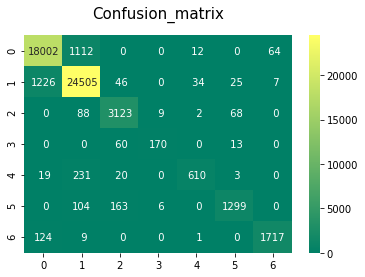

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=100, n_estimators = 100, bootstrap = True)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
result_rf = accuracy_score(y_test, y_pred_rf)*100
print("Accuracy Model : %.2f%% " % result_rf)

# With the feature scale and normalize train dataset.
rf.fit(x_train_fs, y_train)
y_pred_rf_fs = rf.predict(x_test_fs)
result_rf_fs = accuracy_score(y_test, y_pred_rf_fs)*100
print("Accuracy Model with X_FS : %.2f%% " % result_rf_fs)

sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [28]:
# Parameter tuning

## Search grid for optimal parameters
rf_param_grid = {#"max_depth": [100,200],
              #"max_features": [1, 3, 10],
              #"min_samples_split": [2, 3, 10],
              #"min_samples_leaf": [1, 3, 10],
              #"bootstrap": [True, False],
              #"n_estimators" :[100,200]
                }
#"criterion": ["gini"]

rf_gs = GridSearchCV(rf,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

rf_gs.fit(x_train,y_train)

# Best score
param_rf_gs = rf_gs.best_estimator_
result_rf_gs = rf_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_rf_gs))

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  4.5min remaining:  4.5min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  4.5min finished


Accuracy CV : 94.82% 


### Naïve Bayes Classifier

Accuracy Model : 50.71% 
Accuracy Model with X_FS : 50.71% 


Text(0.5,1.05,'Confusion_matrix')

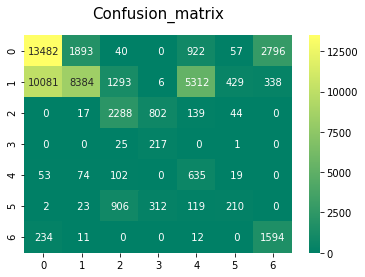

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)
result_gnb = accuracy_score(y_test, y_pred_gnb)*100
print("Accuracy Model : %.2f%% " % result_gnb)

# With the feature scale and normalize train dataset.
y_pred_gnb_fs = gnb.fit(x_train_fs, y_train).predict(x_test_fs)
result_gnb_fs = accuracy_score(y_test, y_pred_gnb_fs)*100
print("Accuracy Model with X_FS : %.2f%% " % result_gnb_fs)

sns.heatmap(confusion_matrix(y_test,y_pred_gnb),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [30]:
#Cross-Validation
gnb_gs = GridSearchCV(gnb,param_grid = {}, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gnb_gs.fit(x_train,y_train)

# Best score
param_gnb_gs = gnb_gs.best_estimator_
result_gnb_gs = gnb_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_gnb_gs))

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    7.4s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.4s finished


Accuracy CV : 51.11% 


### Decision Tree Classifier

Accuracy Model : 85.12% 
Accuracy Model with X_FS : 85.12% 


Text(0.5,1.05,'Confusion_matrix')

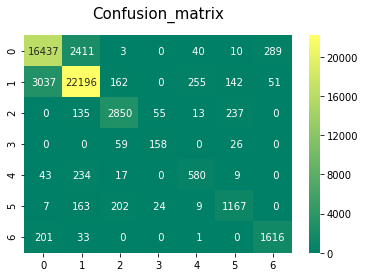

In [31]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
result_dt = accuracy_score(y_test, y_pred_dt)*100
print("Accuracy Model : %.2f%% " % result_dt)

# With the feature scale and normalize train dataset.
dt.fit(x_train_fs, y_train)
y_pred_dt_fs = dt.predict(x_test_fs)
result_dt_fs = accuracy_score(y_test, y_pred_dt_fs)*100
print("Accuracy Model with X_FS : %.2f%% " % result_dt_fs)

sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

## Search grid for optimal parameters
dt_param_grid = {"presort": [True, False]}

dt_gs = GridSearchCV(dt,param_grid = dt_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
dt_gs.fit(x_train,y_train)

# Best score
param_dt_gs = dt_gs.best_estimator_
result_dt_gs = dt_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_dt_gs))

Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed: 33.5min finished


### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=7, learning_rate=1.0, max_depth=5, random_state=0)
gbc.fit(x_train, y_train)

y_pred_gbc = gbc.predict(x_test)
result_gbc = accuracy_score(y_test, y_pred_gbc)*100
print("Accuracy Model : %.2f%% " % result_gbc)

# With the feature scale and normalize train dataset.
gbc.fit(x_train_fs, y_train)
y_pred_gbc_fs = gbc.predict(x_test_fs)
result_gbc_fs = accuracy_score(y_test, y_pred_gbc_fs)*100
print("Accuracy Model with X_FS: %.2f%% " % result_gbc_fs)

sns.heatmap(confusion_matrix(y_test,y_pred_gbc),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
gbc_param_grid = {}
gbc_gs = GridSearchCV(gbc,param_grid = gbc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gbc_gs.fit(x_train,y_train)

# Best score
param_gbc_gs = gbc_gs.best_estimator_
result_gbc_gs = gbc_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_gbc_gs))

### Extra Trees Classifier 

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import ExtraTreesClassifier

extc = ExtraTreesClassifier(n_estimators=1000,max_features= len(x_train.columns)-1,criterion= 'entropy',min_samples_split= 5,max_depth= 150, min_samples_leaf= 30)      
extc.fit(x_train,y_train) 

y_pred_extc = extc.predict(x_test)
result_extc = accuracy_score(y_test, y_pred_extc)*100
print("Accuracy Model : %.2f%% " % result_extc)

# With the feature scale and normalize train dataset.
extc.fit(x_train_fs,y_train) 
y_pred_extc_fs = extc.predict(x_test_fs)
result_extc_fs = accuracy_score(y_test, y_pred_extc_fs)*100
print("Accuracy Model with X_FS: %.2f%% " % result_extc_fs)

sns.heatmap(confusion_matrix(y_test,y_pred_extc),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
extc_param_grid = {'n_estimators' : [400],
                   'max_depth' : [400],
                   'warm_start': [True] 
                  }

extc_gs = GridSearchCV(extc,param_grid = extc_param_grid, cv=4, scoring="accuracy", n_jobs= -1, verbose = 1)

extc_gs.fit(x_train,y_train)

# Best score
param_extc_gs = extc_gs.best_estimator_
result_extc_gs = extc_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_extc_gs))

### Descision Tree Classifier

In [ ]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
result_dt = accuracy_score(y_test, y_pred_dt)*100
print("Accuracy Model : %.2f%% " % result_dt)

# With the feature scale and normalize train dataset.
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
result_dt = accuracy_score(y_test, y_pred_dt)*100
print("Accuracy Model : %.2f%% " % result_dt)

sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
#Cross-Validation
dt_param_grid = {"presort": [True, False]}

dt_gs = GridSearchCV(dt,param_grid = dt_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
dt_gs.fit(x_train,y_train)

# Best score
param_dt_gs = dt_gs.best_estimator_
result_dt_gs = dt_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_dt_gs))

### Model for the submit:

In [ ]:
# We can see that the Random forest Classifier has the best accuracy. So we are going to use this one for the submit.
# For better performance we are going to train the model on all the train dataset and not the split x_train and x_test.
# Random Forest Classifier on all the training dataset:

from sklearn.ensemble import RandomForestClassifier

rf_final = RandomForestClassifier(n_estimators=300,
                            bootstrap=True,
                            oob_score=True,
                            min_samples_leaf=1,
                            criterion = 'entropy',
                            max_features=0.5,
                            max_depth=175)

rf_final.fit(X, Y)

# Here we don't test the accuracy of this model and we directly submit it.
#y_pred_rf = rf.predict(x_test)

### Export predictions :
Creation of a csv file for the submit of the kaggle.

In [ ]:
test_class = pd.Series(rf_final.predict(test), name="RF")
 
IDtest = pd.DataFrame(test.index.values)
results = pd.concat([IDtest,test_class],axis=1)
results.columns = ['Id', 'Cover_Type']
results.to_csv("result_kaggle.csv",index=False)